


uoa-logo.svg



COMPSYS 306 Artificial Intelligence and Machine Learning 

#<center> **COMPSYS 306 Artificial Intelligence and Machine Learning**
#<center> *Department of Electrical, Computer, and Software Engineering*
<center> The University of Auckland, New Zealand


<center>Waleed Abdulla, Kevin I-Kai Wang and Felix Marattukalam 


**Lab 2:  Supervised Machine Learning: Implementation using Python for Regression and Classification**


  


In [ ]:
#Note: Changing the the sign-off time here will make no difference to the actual sign-off time! But, feel free to change it here for visual satisfaction!  
%%html
<marquee style='width: 30%; color: red;'><b>Lab Start: Week 3: August 1, 2022 -----> Lab Sign-off: Week 4: on August 12, 2022 (2:00 pm) </b></marquee>

**1.	Prerequisites:**

- Completion of Lab 1 with signoff from TA/GTA.
- Theoretical understanding of regression and classification methods. 
- Basics of Python programming.
- Some understanding of: Topic-3 Supervised Learning, Regression and Classification from the lectures.






**2. Steps/ Tasks:**

**Step 1:**  Machine learning and its basic categorisation.

- Similar to what was done in Lab 1, we need to load this notebook in Google Colab. If you have not done this already, you would not be reading this text in Google Colab. 

- Machine learning: The term 'machine learning' is very commonly used in the computer science world and often interchanged with artificial intelligence. It is important to know that machine learning is a field of artificial intelligence (refer to the figure below from your first lecture).

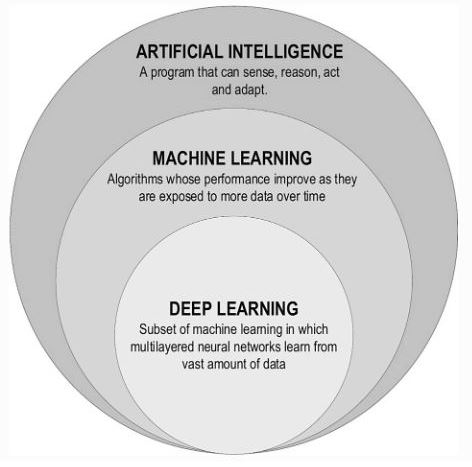

- So, what is machine learning? 

It is the science of programming computers so that they can learn from data. Its difference from classical programming can be understood with the following figure from the lectures.

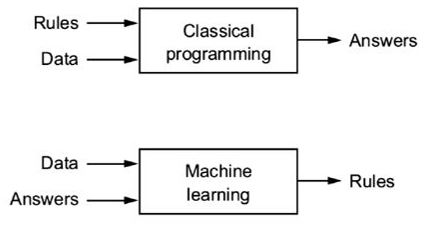

 - So, how many types of 'learning' are there in machine learning? 

The figure below shows a few. Not all are within the scope of this course and hence, we will learn about some of them (especially the ones in the red box) in this course.

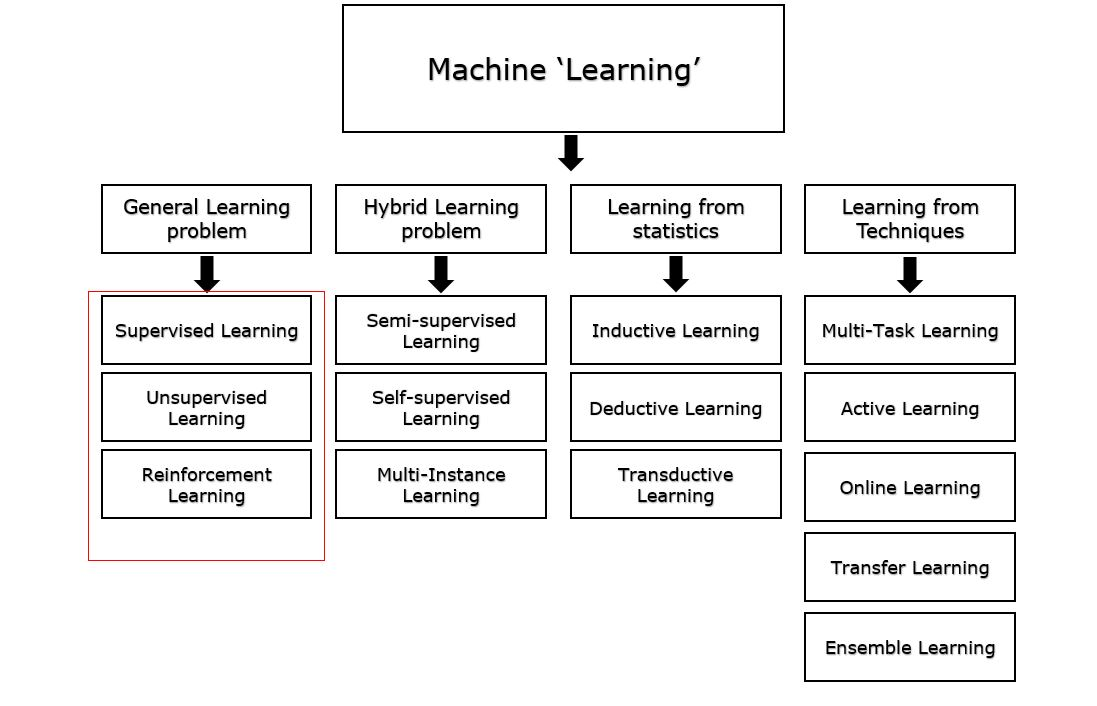

 - Each type of learning can further be classified depending on the method used. 


*Note: Machine learning is a broad ongoing field and most of the research is current. You may find there are more types and sub-types and sub-sub types! As a machine learning engineer it is important for you to be able to identify the basic types of machine learning and apply the suitable type to your target application.*

In this **lab**, we are looking at supervised learning and their two primary types (refer image below).


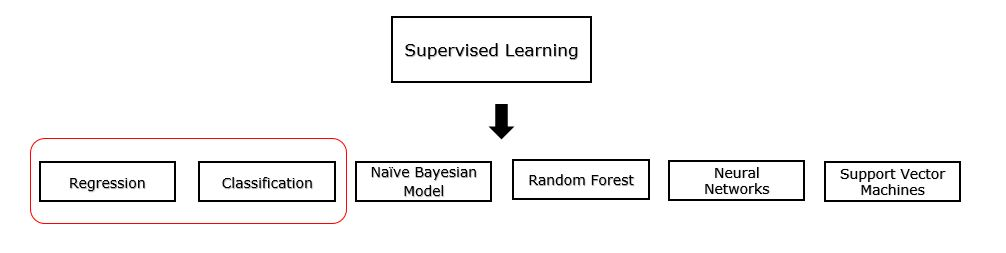

**Step 2 :** Understanding regression and classification

**Regression:** In regression, *continuous* output is generated using the input training data. The output can be based on probablistic comparison, correlation or any specific type of relation in the input training data. Since the output is dependent on the labelled input data it is 'supervised'. E.g. regression can predict the price of a house using inputs such as locality, size, previous value etc.  

**Classification:** Classification is catagorising input data into *discrete* classes. If the classes are limited to two (e.g. a yes or no problem), then its called a binary classification. When the classes are more than two (e.g. the Fashion MNIST data which had 10 classes) then it is called a multiclass classification.  

 - **Types of Regression and Classification** 

As machine learning is a vast field, regression and classification can be further classified into various types and few of them are shown in the figure below. 

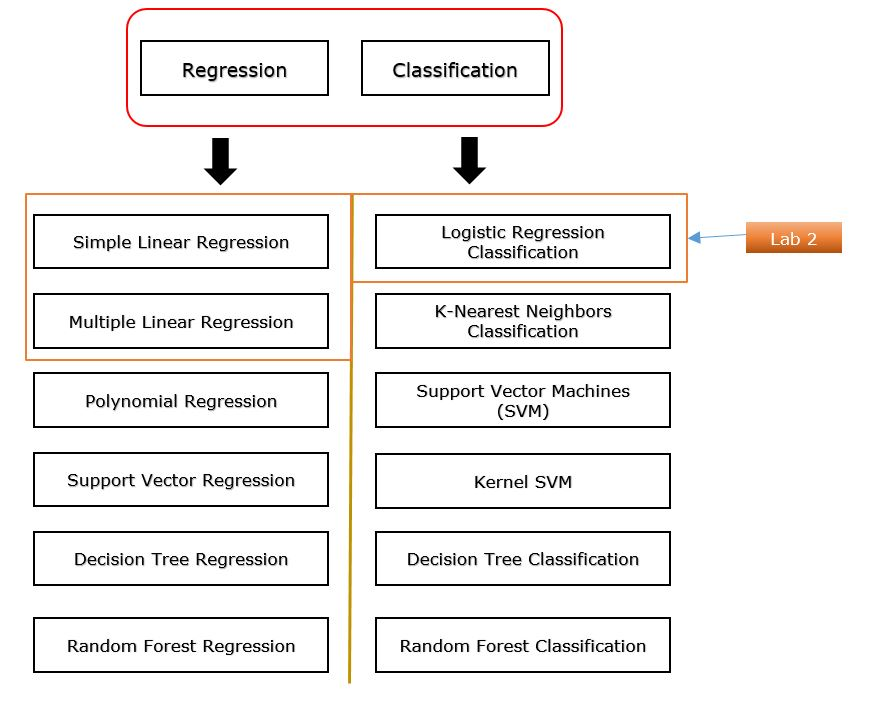

**In this lab we will implement simple linear regression, multiple linear regression and logistic regression classification model.**

Below are a few examples of the many **applications** of linear regression

- to predict the weather of an area
- to predict a product price in future based on past trend
- to predict the GPA based on number of hours invested in study


To understand linear regression, let us look at the equation of a line

\begin{align}
y=m*x + c
\end{align}

Here, 

$y$ is the dependent variable (as it depends on the value of $x$) and $x$ is the independent variable.

$m$ is the slope of the line also known as the gradient.

$c$ is the constant, the y-intercept 

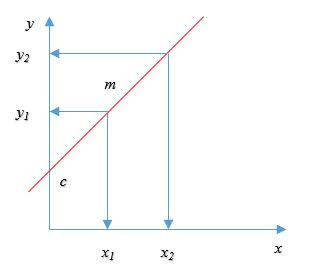

Ideally, $m$ is calculated using the formula. (This can be visualised from the above image). 
 

\begin{align}
m = \frac{y_2-y_1 \, }{x_2 -x_1 \,}
\end{align}


 Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line. This will involve estimating the values of $m$ and $c$ to establish a relationship between $x$ and $y$.


To understand simple linear regression, let us consider the following synthetic data created by us. Synthetic data is useful to perform operations to understand machine learning algorithms. 


In [ ]:
# Python libraries used are numpy and pandas
# https://numpy.org/
# https://pandas.pydata.org/ 
import numpy as np
import pandas as pd

# Definition for place names in an array
place = ['Auckland', 'Hamilton', 'Wellington', 
          'Christchurch', 'Dunedin', 'Queenstown',
          'Invercargill', 'Tauranga', 'Taupō',
          'Taranaki', 'Gisborne', 'Wānaka'
         ]
#n= max number of places in the list of places.
n= len(place)

#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 
data = {'Temperature (°C)': [18.5676,11.3983,9.52115,9.89021,14.2984,13.012,20.4229,11.5627,10.495,15.2075,15.1842,14.2967],
        'Humidity (%)': [72.2303,71.1809,70.4567,67.3063,70.2376,71.5851,72.3959,70.4338,71.9161,71.2799,69.7255,70.5969],
        'Wind Speed (km/h)': [62.1684,60.4517,66.4324,60.9359,65.2169,66.5856,69.1619,62.278,62.2781,66.5346,61.9815,67.3504]
       }
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df = pd.DataFrame(data=data, index=place)
df

 In this database, you see that we have the randomly generated weather information of 12 New Zealand cities. The weather information comprises of temperature (°C), humidity(%) and wind speed (km/h).  

 Since we are going to apply simple linear regression, we will consider only two columns (attributes) from the above database. 

 **Problem definition:** We will use temperature (independent data) to predict humidity (dependent data).

We will understand how this works using statistics and then proceed to implementing it using Python libraries to best appreciate how the libraries work.
 

Let us start by looking at the following worksheet *(Table 1)* based on the above database.

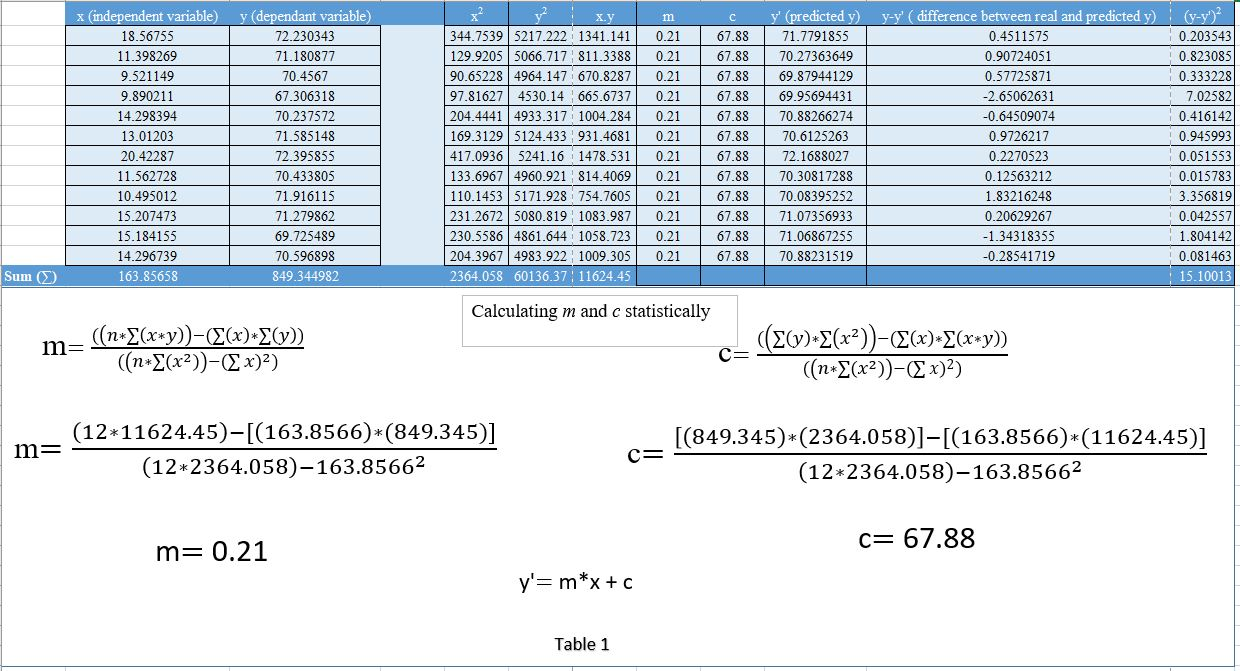

Here, some calculations are done to establish a relationship between $x$ and $y$, thereby understanding how linear regression works. 

$x$ is the independent variable (i.e. temperature)

$y$ is the dependent variable (i.e. humidity)

Now, let us calculate the following:

$m$, which is the slope (calculated statistically using equation given above)

$c$, which is the y intercept (calculated statistically using equation given above)

*note: in stastics there are different ways to calculate $m$* and $c$. We have used one such method for the case in the figure above and obtained the value of $m$ to be 0.21 and $c$ as 68.88.  

Once we obtain the value of *$m$* and *$c$*, we have established a *possible* relationship between $x$ and $y$. Remember that our aim is to predict humidity $y'$ from temperature $x$. Using the established relationship, the predicted output $y'$ can be calculated for each input data point $x$. This is calculated (see Table 2 below) and plotted in the image below.

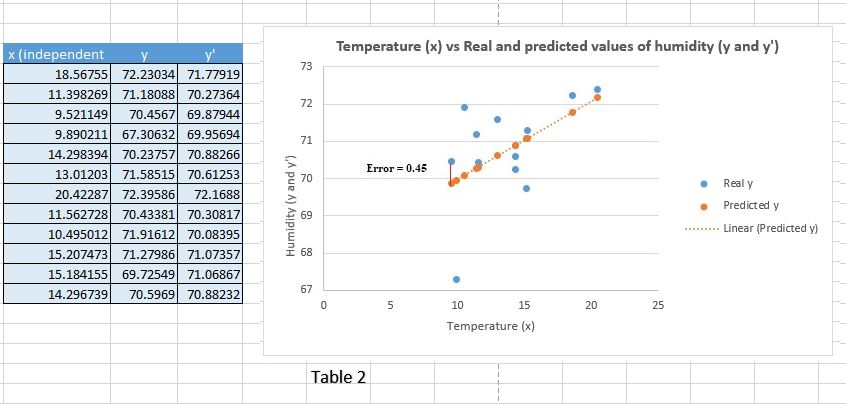

The regression line is seen in orange along with the predicted data points for humidity. The predicted value $y'$ is shown by the points in orange and the actual value  $y$ is shown by the points in blue. As an example the distance between the predicted and actual point is shown in the figure above. The error in this case was found to be *0.45*. 

The further away predicted points *(orange)* are from the actual points *(blue)*, the greater is the error. The goal of a machine learning model is to minimise this distance and find the best fit regression line. The error is calcualted as an error function and minimised by updating the values of $m$ and $c$.  


There are different error functions. In the above example we calculated the difference between the predicted value $y'$ and actual value $y$ and then squared the result to calculate its sum. Hence, we used sum of squared error funtion. Some other commonly used error functions are sum of absolute errors and root mean square error. 

The error in the predicted value is $(y-y')$ and the sum of the squared error is **15.10013 (see the above Table 1)**. So, the goal of this machine learning model is to reduce this squared error and find the best linear regression line. 


**Step 3:** Implementation of simple linear regression using Python libraries. 

Now, let us implement linear regression on the above database using Python libraries to train a machine learning model that can predict humidity (dependent variable) from temperature data (independent variable). We will then use this model to input new temperature values  and predict the corresponding humidity. 

In [ ]:

# Python libraries being used are numpy and pandas
import numpy as np
import pandas as pd

# Definition for place names in an array
place = ['Auckland', 'Hamilton', 'Wellington', 
          'Christchurch', 'Dunedin', 'Queenstown',
          'Invercargill', 'Tauranga', 'Taupō',
          'Taranaki', 'Gisborne', 'Wānaka'
         ]
#n= max number of places in the list of places.
n= len(place)


data = {'Temperature (°C)': [18.5676,11.3983,9.52115,9.89021,14.2984,13.012,20.4229,11.5627,10.495,15.2075,15.1842,14.2967],
        'Humidity (%)': [72.2303,71.1809,70.4567,67.3063,70.2376,71.5851,72.3959,70.4338,71.9161,71.2799,69.7255,70.5969],
        'Wind Speed (km/h)': [62.1684,60.4517,66.4324,60.9359,65.2169,66.5856,69.1619,62.278,62.2781,66.5346,61.9815,67.3504]
       }

df = pd.DataFrame(data=data, index=place)
df

,Temperature (°C),Humidity (%),Wind Speed (km/h)
Auckland,18.56760,72.2303,62.1684
Hamilton,11.39830,71.1809,60.4517
Wellington,9.52115,70.4567,66.4324
Christchurch,9.89021,67.3063,60.9359
Dunedin,14.29840,70.2376,65.2169
Queenstown,13.01200,71.5851,66.5856
Invercargill,20.42290,72.3959,69.1619
Tauranga,11.56270,70.4338,62.2780
Taupō,10.49500,71.9161,62.2781
Taranaki,15.20750,71.2799,66.5346


In [ ]:
#since we are performing simple linear regression we will drop 'Wind Speed (km/h) column' to make prediction of humidity (y) based on temperature (x) 
# from Lab1 we know how to drop columns in a database.
x=df.drop(['Wind Speed (km/h)','Humidity (%)'],axis=1).values
x

array([[18.5676 ],
       [11.3983 ],
       [ 9.52115],
       [ 9.89021],
       [14.2984 ],
       [13.012  ],
       [20.4229 ],
       [11.5627 ],
       [10.495  ],
       [15.2075 ],
       [15.1842 ],
       [14.2967 ]])

In [ ]:
y=df.drop(['Wind Speed (km/h)','Temperature (°C)'],axis=1).values
y

array([[72.2303],
       [71.1809],
       [70.4567],
       [67.3063],
       [70.2376],
       [71.5851],
       [72.3959],
       [70.4338],
       [71.9161],
       [71.2799],
       [69.7255],
       [70.5969]])

In [ ]:
#importing libraries
from sklearn.linear_model import LinearRegression

In [ ]:
#defining the model
model = LinearRegression()

In [ ]:
#fitting the model to our data
model.fit(x, y)
LinearRegression()

LinearRegression()

In [ ]:
#R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable, i.e. (y'-y)^2.


r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.2744450971936312


r_sq a number between 0 and 1 that measures how well a statistical model predicts an outcome. We will now multiply this by 100 to get the accuracy in %.

In [ ]:
#Multiplying the score by 100 to calculate the accuracy. 
accuracy= r_sq*100
print('The accuracy of this model for the prediction is', accuracy,'%')

The accuracy of this model for the prediction is 27.44450971936312 %


*Note that the accuracy of this model is 27% approximately. This can be due to reasons like synthetic database considered was too small and also the distribution of data may not be linear. Since this was just an example database to display how linear regression works, we will accept the poor recognition accuracy.*

In [ ]:
#Lets check the 'c' and 'm' to compare it with our statistical calculations
print(f"intercept 'c': {model.intercept_}")
print(f"slope 'm': {model.coef_}")


intercept 'c': [67.88011379]
slope 'm': [[0.21228087]]


In [ ]:
# These are the predicted values of y
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[[71.82166009]
 [70.29975484]
 [69.90127181]
 [69.97961618]
 [70.9153906 ]
 [70.64231248]
 [72.21550479]
 [70.33465382]
 [70.10800153]
 [71.10837514]
 [71.10342899]
 [70.91502972]]


In [ ]:
#let us predict some new 'y' values for  some new 'x' value inputs, i.e we are now using new temperature data to predict what its corresponding humidity would be. 
#This is being done using the model we just "trained"

x_new = np.array([20,11,15,22]).reshape((-1, 1))
x_new

array([[20],
       [11],
       [15],
       [22]])

Now the model is ready to predict values of humidity with **new** temperature data. This is because the model has managed to estimate $m$ and $c$ based on the imput data provided. This process is known as **testing** of the machine learning model. 

Here, the model is predicting humidity using unseen temperature values.  

In [ ]:
y_new = model.predict(x_new)
y_new

array([[72.12573121],
       [70.21520337],
       [71.06432686],
       [72.55029295]])

As you can see that for the new temperature values 20, 11, 15 and 22 degrees the corresponding humidity is predicted as 72.12%, 70.21%, 71.06% and 72.55% respectively. 

**Step 4:** Multiple linear regression


For linear regression we had one independent variable $x$ affecting the dependent variable $y$. In real world problems, that would not be the case. There would be multiple $x$ variables (factors) that govern the dependent variable $y$.  

For example, the humidity in New Zealand cities would also be affected by  other factors such as rainfall, wind speed in addition to temperature. 

In such cases, the concept would exactly be the same as for simple linear regression, but more independent variables such as $x_1, x_2, x_3 ... x_n  $ would be considered to find the best fit regression line to predict $y$ accurately.

\begin{align}
y=m_1*x_1 + m_2*x_2 +m_3*x_3 .......m_n*x_n + c
\end{align}

where, $n$ is the number of independent variables considered. 

Let us perform multiple linear regression by considering temperature ($x_1$) and wind speed ($x_2$) to predict humidity ($y$) using Python libraries.  

In [ ]:
# Importing the database again

# Definition for place names in an array
place = ['Auckland', 'Hamilton', 'Wellington', 
          'Christchurch', 'Dunedin', 'Queenstown',
          'Invercargill', 'Tauranga', 'Taupō',
          'Taranaki', 'Gisborne', 'Wānaka'
         ]
#n= max number of places in the list of places.
n= len(place)


data = {'Temperature (°C)': [18.5676,11.3983,9.52115,9.89021,14.2984,13.012,20.4229,11.5627,10.495,15.2075,15.1842,14.2967],
        'Humidity (%)': [72.2303,71.1809,70.4567,67.3063,70.2376,71.5851,72.3959,70.4338,71.9161,71.2799,69.7255,70.5969],
        'Wind Speed (km/h)': [62.1684,60.4517,66.4324,60.9359,65.2169,66.5856,69.1619,62.278,62.2781,66.5346,61.9815,67.3504]
       }

df = pd.DataFrame(data=data, index=place)
df

,Temperature (°C),Humidity (%),Wind Speed (km/h)
Auckland,18.56760,72.2303,62.1684
Hamilton,11.39830,71.1809,60.4517
Wellington,9.52115,70.4567,66.4324
Christchurch,9.89021,67.3063,60.9359
Dunedin,14.29840,70.2376,65.2169
Queenstown,13.01200,71.5851,66.5856
Invercargill,20.42290,72.3959,69.1619
Tauranga,11.56270,70.4338,62.2780
Taupō,10.49500,71.9161,62.2781
Taranaki,15.20750,71.2799,66.5346


In [ ]:
#assigning the data for input and output
x=df.drop(['Humidity (%)'],axis=1).values
y=df['Humidity (%)'].values

In [ ]:
# to see the independent variables being considered
x

array([[18.5676 , 62.1684 ],
       [11.3983 , 60.4517 ],
       [ 9.52115, 66.4324 ],
       [ 9.89021, 60.9359 ],
       [14.2984 , 65.2169 ],
       [13.012  , 66.5856 ],
       [20.4229 , 69.1619 ],
       [11.5627 , 62.278  ],
       [10.495  , 62.2781 ],
       [15.2075 , 66.5346 ],
       [15.1842 , 61.9815 ],
       [14.2967 , 67.3504 ]])

In [ ]:
y

array([72.2303, 71.1809, 70.4567, 67.3063, 70.2376, 71.5851, 72.3959,
       70.4338, 71.9161, 71.2799, 69.7255, 70.5969])

Until now we focused only on the training process of the machine learning models. To understand how the model is performing, a common practice in machine learning is to test the trained model on unseen data. We did this already by providing new temperature data to predict humidity values in simple linear regression. 

In real world application of machine learning models the database is split into training and testing datasets. The training dataset is used for the training process. The testing dataset remains unseen to the model. The testing dataset helps the machine learning engineer conduct performance analysis. 

An illustration of a typical train and test data split can be seen in the image below. 

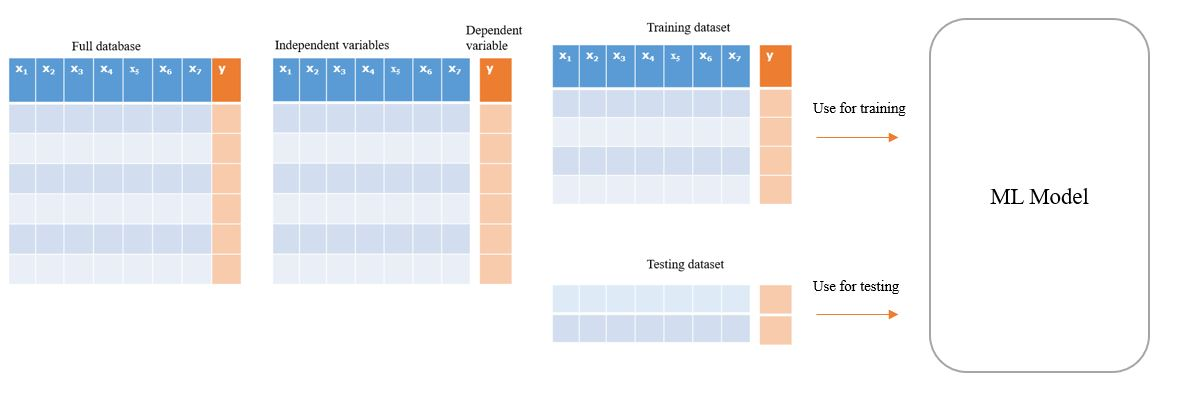

When working on larger databases it is a recommended practice to split the database into training and testing data sets. Some common training and testing data splits are 70-30 % , i.e. 70% training dataset and 30% testing dataset, 80-20%, etc. 

To see this working, let us now split our database into training and testing datasets. We will then use the testing dataset to analyse the performance of multiple linear regression model.   

In [ ]:
#train and test split using sklearn libraries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) #30% of the database is "randomly" chosen as the test set

In [ ]:
# model definition and model fit
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#model prediction on the test dataset
y_pred=model.predict(x_test)
y_pred

array([73.6155831 , 71.77761315, 71.50599224, 71.32576402])

In [ ]:
#checking/verifying the prediction for one row from the independent variable set ( i.e. value of humidity for corresponding temperature and wind speed) 
model.predict([[18.56760,62.1684]])

array([72.23709823])

Text(0.5, 1.0, 'Actual vs Predicted')

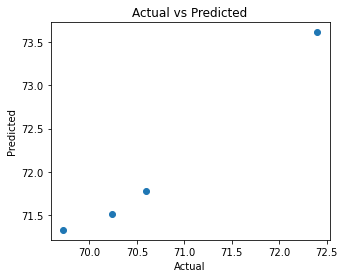

In [ ]:
#Visualizing the test dataset using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted,Difference
0,72.3959,73.615583,-1.219683
1,70.5969,71.777613,-1.180713
2,70.2376,71.505992,-1.268392
3,69.7255,71.325764,-1.600264


Our data split was 70-30 (70% for training set and 30% for test set) and hence, we see 4 records from the 12 total records. In most real world applications we would not perform regression on such small databases. The database would usually have hundreds of datapoints. 

Let us now perform some tasks to better understand linear regression. 

For the task below, we will be using Average Localization Error (ALE) in sensor node localization process in WSNs Data Set. 

This database contains 6 columns (107x6). The first four columns are features, namely anchor ratio, the transmission range of a sensor, node density (here number of sensor nodes), and iteration count. The fifth column is Average Localisation Error ALE (predictand) and the last column is the standard deviation value *(you may ignore standard deviation for this task)*. The parameters listed are the features that help calculate the Average Localization Error (ALE) of a sensor node. Being able to predict the ALE would benefit in selecting the right features for optimal sensor node deployment. *Visit the archive page to read more about the database in detail.*
*https://archive.ics.uci.edu/ml/datasets/Average+Localization+Error+%28ALE%29+in+sensor+node+localization+process+in+WSNs#*

**Task 1:** Preparing a database to perform multiple linear regression using Python libraries:   

 - Import the dataset from the given link and display the first 10 rows. (*Note: this database will also be provided on canvas as a .csv file)*
 - Display the column names (i.e. the features of the database)
 - Assign the independent features to variable x and dependent feature to variable y

*Hint: Ensure that you mount the Google drive if you are loading the .csv file.*

*Recall the operations from Lab-1 for displaying the dataset*

*To assign the independent and dependent features to its respective variables, you can use pandas.DataFrame.drop from Lab-1 or pandas.DataFrame.iloc*

*https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html*
*https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html*

In [1]:
#write your code here
# Mounting google drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
#part of the task
# importing the CSV and showing the database on console

import pandas
import pandas as pd 

# data set location
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv' # replace this path with your own google drive path where the dataset is stored.
df = pd.read_csv(anchordataset) # here the .csv which was downloaded is being read with the help of pandas library function pd.read
df.head(10) # this is to display the first 10 rows


,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943
5,22,18,100,24,1.457228,0.463309
6,18,23,100,14,1.912674,0.440208
7,10,25,200,15,1.432541,0.234996
8,29,25,100,40,0.777449,0.351504
9,20,20,100,30,1.142195,0.230193


In [ ]:
#part of task
#show the column names in the database

#part of the task
# importing the CSV and showing the database on console

import pandas
import pandas as pd 

# data set location
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv' # replace this path with your own google drive path where the dataset is stored.
df = pd.read_csv(anchordataset) # here the .csv which was downloaded is being read with the help of pandas library function pd.read
df.columns # this is to display the columnn names in the database


Index(['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale',
       'sd_ale'],
      dtype='object')

*Hint: Once you have correctly assigned the features to its variables, see that they are similar to the following format*

*Independent variables($x_1$, $x_2$, $x_3$, $x_4$): Anchor ratio, transmission range of a sensor, node density, iteration count.* 

*Dependent variable($y$): Average Localization Error*


***sd_ale is the standard deviation of ALE and should be ignored for this task***

In [ ]:
#part of task
#splitting x and y based on the above description

import pandas
import pandas as pd 

# data set location
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

x=df.drop(['ale','sd_ale'],axis=1).values
x

array([[ 30,  15, 200,  40],
       [ 15,  15, 100,  70],
       [ 30,  15, 100,  50],
       [ 15,  20, 100,  20],
       [ 30,  15, 100,  40],
       [ 22,  18, 100,  24],
       [ 18,  23, 100,  14],
       [ 10,  25, 200,  15],
       [ 29,  25, 100,  40],
       [ 20,  20, 100,  30],
       [ 15,  20, 200,  20],
       [ 18,  23, 100,  16],
       [ 18,  23, 100,  24],
       [ 30,  15, 200,  70],
       [ 30,  20, 100,  50],
       [ 22,  18, 100,  18],
       [ 14,  17, 200,  40],
       [ 15,  15, 100,  60],
       [ 14,  17, 200,  70],
       [ 15,  20, 100,  40],
       [ 15,  15, 100,  40],
       [ 15,  20, 100,  70],
       [ 20,  20, 100,  20],
       [ 30,  15, 200,  50],
       [ 20,  20, 200,  30],
       [ 27,  12, 300,  34],
       [ 20,  20, 200,  40],
       [ 15,  15, 100, 100],
       [ 30,  20, 100,  30],
       [ 14,  17, 200,  80],
       [ 30,  15, 200,  60],
       [ 30,  15, 100, 100],
       [ 15,  15, 200,  80],
       [ 30,  15, 200,  80],
       [ 18,  

In [ ]:
import pandas
import pandas as pd 

# data set location
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
y

array([[0.77354593],
       [0.91194068],
       [0.81486731],
       [1.43533214],
       [1.26590905],
       [1.4572277 ],
       [1.91267361],
       [1.4325413 ],
       [0.7774486 ],
       [1.1421954 ],
       [0.69436119],
       [1.53652172],
       [1.05409655],
       [0.61686876],
       [1.30608993],
       [2.56840726],
       [0.85707336],
       [1.3607707 ],
       [0.76108279],
       [1.40004451],
       [0.96857888],
       [1.23699585],
       [1.42404241],
       [0.62368694],
       [0.63952416],
       [0.52718507],
       [0.58363381],
       [0.83554047],
       [0.85618466],
       [0.6943554 ],
       [0.61048454],
       [0.89805638],
       [0.57929733],
       [0.58401039],
       [1.42744727],
       [0.48997044],
       [1.97268335],
       [0.85212508],
       [0.98704366],
       [0.77758742],
       [2.1784816 ],
       [0.77150364],
       [1.23092792],
       [0.75453726],
       [0.53865123],
       [0.95529645],
       [1.06855144],
       [0.798

In [ ]:
#part of task


**Task 2:** Split the database into training and testing dataset. For this task use 80-20 data split as the ratio. Display the shape of train and test dataset to verify the split.

In [ ]:
#train and test split using sklearn libraries

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code

# data set location

anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set


print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)




(22, 4) (22, 1) (85, 4) (85, 1)


**Task 3:** Perform multiple linear regression to predict ALE.

*Note: The purpose of predicting ALE is to optimize anchor ratio, the transmission range of a sensor, node density (here number of sensor nodes), and iteration count. Knowing the error pattern will help determine the optimal parameters for a network engineer who is designing and deploying this Wireless Sensor Network (WSN).*

In [ ]:
#write your code here

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set

from sklearn.linear_model import LinearRegression
lingreg=LinearRegression()
lingreg.fit(x_train,y_train)



LinearRegression()

**Task 4:** Once the model has been trained, use the model to display the predicted values for ALE.

*Predicted values are generated with the unseen test data that you kept aside when splitting the data.*

In [ ]:
#write your code here

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set

from sklearn.linear_model import LinearRegression
lingreg=LinearRegression()
lingreg.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([[0.84113317],
       [1.06689271],
       [1.40134218],
       [1.22754513],
       [0.93898692],
       [0.5586462 ],
       [1.01540512],
       [1.02844616],
       [0.97444534],
       [0.79139034],
       [0.41954773],
       [1.44770833],
       [1.06736762],
       [0.81585842],
       [1.00131068],
       [0.68095566],
       [0.63168774],
       [0.76471497],
       [0.87900122],
       [0.47151023],
       [1.39034565],
       [1.07726635]])

**Task 5:**  Using scatterplot to visualize the actual and predicted values of ALE.  

Plot the actual vs predicted value of ALE. You can use functions from matplotlib for this task. *The documentation for the matplotlib scatterplot can be found in 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html*  

Ensure that the plot **also has an identity line.**

*Note: The points on the identity line show an exact match of actual and predicted values of ALE. For eg. if the actual ALE value was 0.6 and the predicted ALE value was also 0.6 then this point would be on the identity line.*  

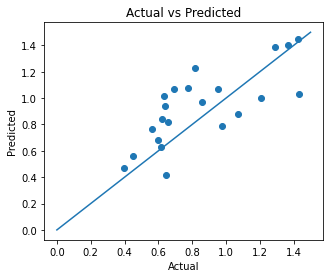

In [ ]:
#write your code here

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set

from sklearn.linear_model import LinearRegression
lingreg=LinearRegression()
lingreg.fit(x_train,y_train)

y_pred=model.predict(x_test)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([0,1.5],[0,1.5])



**Task 6:** Display the actual ALE value $y$, the predicted ALE value $y'$, and the difference between the actual and predicted value of ALE $(y-y')$. Also compute the r2_score and display the same.

*Hint: 1. These values are stored in the variables you used. For example, it could be y_test for actual values.*

*2. scikitlearn metrics have functions to calculate r2_score. Look into the documentation. We are particularly interested only in the accuracy of the model.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html*

In [3]:
#write your code here

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set

from sklearn.linear_model import LinearRegression
lingreg=LinearRegression()
lingreg.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(y_test)
print(y_pred)

print(y_test-y_pred)







NameError: ignored

In [ ]:
#write your code here
#code to show the r_2 score. 

#importing linear regression from sklearn. Defining the model into lingreg(). Fitting the model to work on x_train and y_train

import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
anchordataset = '/content/gdrive/MyDrive/CS306/database/numerical/mcs_ds_edited_iter_shuffled.csv'
df = pd.read_csv(anchordataset)

from sklearn.model_selection import train_test_split
x=df.drop(['ale','sd_ale'],axis=1).values
y=df.drop(['anchor_ratio', 'trans_range', 'node_density', 'iterations','sd_ale'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #20% of the database is "randomly" chosen as the test set

from sklearn.linear_model import LinearRegression
lingreg=LinearRegression()
lingreg.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.471517852861592

**Step 5:** **Classification using logistic regression classifier**

Note: Often the word 'regression' in logistic regression classification confuses this method to be a regression method. This is not the case. 



If the number of classes are limited to two then its called binary classification. For example, yes and no problems such as a person is having a disease or not, is the incoming email a spam or not, is the given image a cat or a dog. In such cases the output desired for prediction is binary (i.e. either a 0 or a 1). 

Depending on the task, the number of classes can be more than two. These tasks can be solved with multiclass classification. For example,  recall the Fashion MNIST database, where the task was to catagorize the given set of images into 10 classes. Another example would be to classify the weather into specific classes such as rainy, sunny, cloudy or frosty. 

We will now focus on implementing a logistic regression classifier for binary classification and show its advantages over linear regression.

Consider a sample task where we are estimating if a person has fever or not (if fever is present, class = $1$, if fever is not present, class = $0$) using the body temperature in °C. 
 


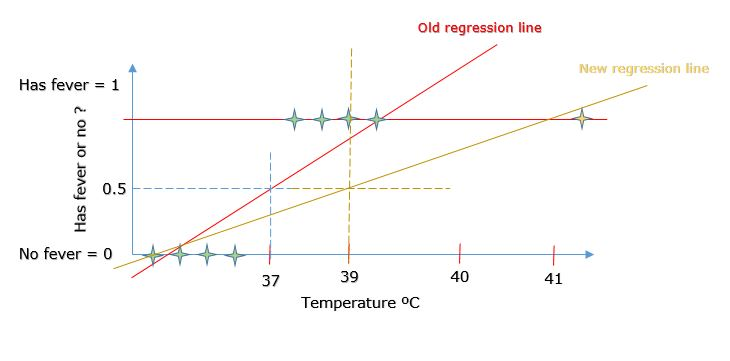

The figure above shows a graph between discrete values representing if a person is having fever *vs* temperature in °C. Let's go through the description below to understand this graph and see how logistic regression classifier works.    

Refering to the figure above, the normal human body temperature for an adult is 37 °C 
Ref: https://www.health.govt.nz/your-health/conditions-and-treatments/diseases-and-illnesses/fever/fever-adults  

Let us apply linear regression to this classification problem.

Considering the blue points alone in the graph the linear regression line would be as shown in red. We then set the threshold for classification at 0.5 (also known as decision boundary). Looking at the intersection of the old (red) regression line and the threshold, if the temperature is above 37°C, then the threshold of 0.5 is crossed and the person will be classified as having fever. If the temperature is below 37°C then the person will be classified as not having fever . 

This hypothesis works well when the temperature range is only between 35-39°C.

Suppose a new datapoint (*say temperature above 41°C marked by the yellow point*) is added, the new linear regression line would adapt to reduce the prediction error. (Look at the new regression line in yellow in above image). 

This change in regression line will introduce a new issue. The new regression line would now give false predictions as the threshold setting of 0.5 which was initially at 37°C *(the correct temperature for classification)* moved to 39°C. 

Only using linear regression as done in this example would result in anyone having a temperature between 37°C - 39°C classified as not having fever, even though that person is actually having fever. This is a clear case of **misclassification** and can be disastrous in real world classification problems. 

To address such a situation, we use a sigmoid function also called as a logistic function *(and hence the term "logistic" regression classifier)*.

*Note: Refer to the lectures (Topic-3 Supervised Learning, Regression and Classification, page 20) for the derivation.*

A simple equation to represent a sigmoid function is given below.

\begin{align}
f(z) = \frac{1 \, }{1 + e^{-z} \,}
\end{align}

Here, $z$ is the independent variable.

The figure below represents this sigmoid function. 

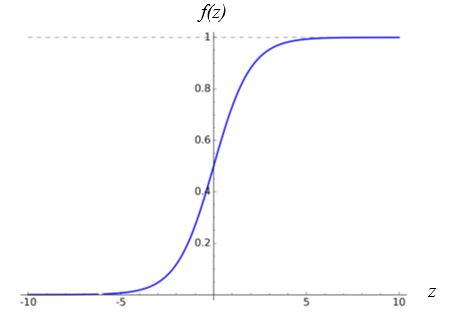

(*recap: Step 4 of this lab*)
we can represent $y$ in terms of $x$ using linear regression as 

\begin{align}
y=m_1*x_1 + m_2*x_2 +m_3*x_3 .......m_n*x_n + c
\end{align}

Applying sigmoid function on $y$, the logistic regression classifier in terms of $x$ would be

\begin{align}
Θ(y)  = \frac{1 \, }{1 + e^{-y} \,}=\frac{1 \, }{1 + e^{-(m_1*x_1 + m_2*x_2 +m_3*x_3 .......m_n*x_n + c)} \,}
\end{align}

Where $Θ(y)$ is the logistic regression. On applying decision boundary of 0.5 *(as is for a sigmoid function)*, this becomes the logistic regression classifier and is shown in the figure below *(marked in green)*.

To better understand how this is different from linear regression and also see how this would help solve our misclassification issue *which we saw in the beginning of Step 5*, let us look at the figure below.   



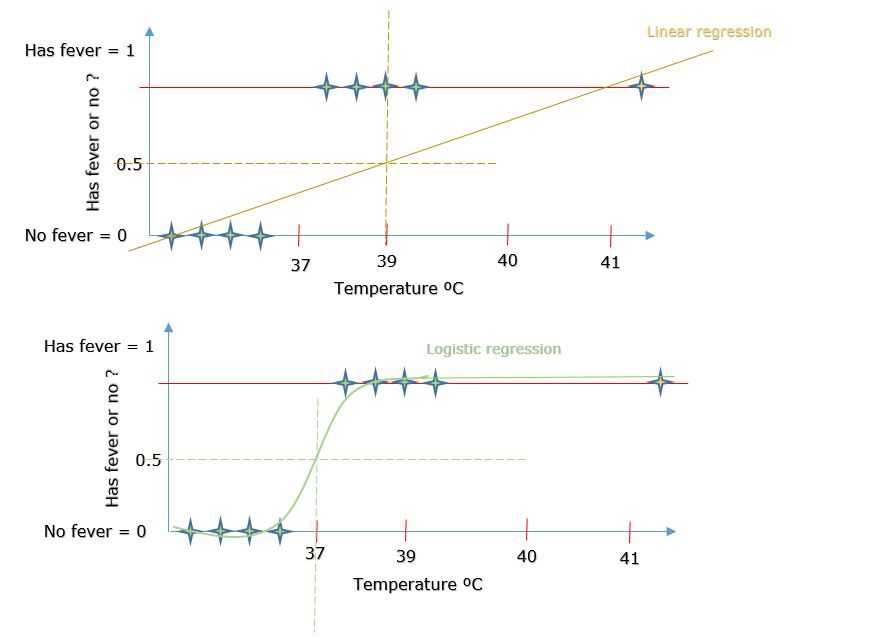



In the figure, two cases (linear regression and logistic regression calssifier) are shown for comparison. 

You can see that the threshold is not changing from 37 °C in case of logistic regression classifier, and still the new datapoint (temperature above 41°C is being classified as having fever without misclassifying previous datapoints (i.e. temperature between 37°C - 39°C). 

**Step 6:** Implementation of logistic regression classifier using Python libraries.





We will use the following database taken from https://www.kaggle.com/datasets/mssmartypants/rice-type-classification to classify the rice type based on attributes (independent variables) such as
Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness and AspectRatio 

The two classes of rice are Jasmine - 1, Gonen - 0.

*Note: since we have only two classes. This would be a binary classifiction problem.*


In [ ]:
# importing the CSV and showing the database on console
import pandas
import pandas as pd 
dataset = '/content/gdrive/MyDrive/CS306/database/numerical/riceClassification.csv' 
df = pd.read_csv(dataset)
print(df.shape) 
df 

(18185, 12)


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


We see that there are 12 columns and 18185 rows. We will now prepare the dataset to perform logistic regression classification.



In [ ]:
#assigning the indepedent variables to x. Here we exclude the following columns:
# Id: as this would be irrelevant for classification
# Class: as this is our prediction class/ dependent variable y (this can be 0 or 1 because it is classification) 
x=df.iloc[:,1:11]
y=df.iloc[:,11]

In [ ]:
#Showing x
x

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [ ]:
#showing y
y

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

In [ ]:
# performing the train/test data split. We are using 70-30 as the ratio. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# importing the sklearn library for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#defining logistic regression into logreg
logreg = LogisticRegression(max_iter=300)
#fitting the training data to the logistic regression model
logreg.fit(x_train,y_train)

#predicting the values of y using the test data from x
y_pred=logreg.predict(x_test)

In [ ]:
#importing metrics library from sklearn to evaluate the logistic regression. 
from sklearn import metrics

# this part can be better understood after learning about confusion metrics. For now this can be ignored. 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
#we are particularly interested in accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


We can see that we achieved an accuracy of approximately 98.00%. 

In multilabel classification, the sklearn accuracy function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.

**Task 7:** Import the blood transfusion database using the  url below. Identify the independent variable/ variables and the dependent variable(or prediction class). 

Link:
'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data' 

*Note: you will need to load the database using this .data link (refer to lab 1)*

In [ ]:
#write your code here

# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')
df # this is to display the database.


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
print('The independent variables are Recency (months), Frequency (times), Monetary (c.c.blood), Time (months)')
print('The dependent variable is whether he/she donated blood in March 2007')

The independent variables are Recency (months), Frequency (times), Monetary (c.c.blood), Time (months)
The dependent variable is whether he/she donated blood in March 2007


**Task 8:** Assign the independent and dependent variables to x and y and also perform train/ test data splitting (use the 70/30 split).

In [ ]:
#assigning the indepedent variables to x. Here we exclude the following columns:
# Id: as this would be irrelevant for classification
# Class: as this is our prediction class/ dependent variable y (this can be 0 or 1 because it is classification) 

# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]

# performing the train/test data split. We are using 70-30 as the ratio. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)




**Task 9:** Display x and y. Also, display the shape of training and testing dataset after splitting them.

In [ ]:
# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]


x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [5]:
# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]


y


0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [ ]:
#displaying the shape of training and testing dataset

# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]

# performing the train/test data split. We are using 70-30 as the ratio. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)


(225, 4) (225,) (523, 4) (523,)


**Task 10:** Perform logistic regression using Python libraries on blood-transfusion database above and calculate the accuracy using sklearn metrics.

In [ ]:
# Importing libraries:
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]

# performing the train/test data split. We are using 70-30 as the ratio. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# importing the sklearn library for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#defining logistic regression into logreg
logreg = LogisticRegression(max_iter=300)
#fitting the training data to the logistic regression model
logreg.fit(x_train,y_train)

#predicting the values of y using the test data from x
y_pred=logreg.predict(x_test)

In [ ]:

#write your code here
#we are particularly interested in accuracy
import pandas
import pandas as pd # here we are just saying that we would like to call pandas as pd from now on in 'our' code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

x=df.iloc[:,0:4]
y=df.iloc[:,4]

# performing the train/test data split. We are using 70-30 as the ratio. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# importing the sklearn library for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#defining logistic regression into logreg
logreg = LogisticRegression(max_iter=300)
#fitting the training data to the logistic regression model
logreg.fit(x_train,y_train)

#predicting the values of y using the test data from x
y_pred=logreg.predict(x_test)
#importing metrics library from sklearn to evaluate the logistic regression.
 
from sklearn import metrics

# this part can be better understood after learning about confusion metrics. For now this can be ignored. 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7422222222222222


**Quiz:**



**Question 1** Logistic regression classifier is a regression model?

In [ ]:
Answer1 = 'False, its a classification model' #@param ["True, it is a regression model", "False, its a classification model" ,"it is neither a regression or a classification model"] {allow-input: true}

**Question 2** Which function is used in logistic regression?

In [ ]:
Answer2 = 'sigmoid function' #@param ["sinusoid function", "sigmoid function" ,"cosine function","none of the above"] {allow-input: true}

**Question 3** In the code x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0), what does test_size=0.4 mean ? 





In [ ]:
Answer3 = ' A train and test split of 60% and 40% respectively' #@param ["A train and test split of 70% and 30% respectively" ," A train and test split of 40% and 60% respectively"," A train and test split of 60% and 40% respectively"] {allow-input: true}

**Question 4** In linear regression model, what does the model do to find the best fit line? 

In [ ]:
Answer4 = 'The model squares the distance between the predicted and actual datapoints' #@param ["The model increases the distance between the predicted and actual datapoints" ,"The model reduces the distance between the predicted and actual datapoints" , "The model squares the distance between the predicted and actual datapoints"] {allow-input: true}